In [2]:
import numpy as np
import matplotlib.pyplot as plt

#生成随机矩阵
arr1 = np.random.rand(3, 2)
print(arr1)

[[0.20238086 0.93113532]
 [0.71452458 0.40564642]
 [0.4569982  0.54938516]]


In [2]:
arr2 = np.random.rand(3, 2, 4)
print(arr2)

[[[0.23687627 0.19938817 0.84477923 0.5096447 ]
  [0.69119396 0.97330095 0.66684785 0.84609316]]

 [[0.67290984 0.76582579 0.45957755 0.70151552]
  [0.84126641 0.49737255 0.42676384 0.89840264]]

 [[0.33368606 0.06161586 0.74987785 0.11848081]
  [0.00751836 0.74043803 0.09762556 0.87294058]]]


In [3]:
zt1 = np.random.randn(10, 1)
print(zt1)
np.linspace

[[ 0.99773702]
 [-1.23403476]
 [-0.12663622]
 [-2.79386947]
 [ 0.66570479]
 [ 0.11862897]
 [ 0.13321163]
 [-0.23888661]
 [ 0.05246222]
 [ 1.29240838]]


[[-3.18853505e-01]
 [-1.60298056e+00]
 [-1.53521787e+00]
 [-5.70400895e-01]
 [-2.16728301e-01]
 [ 2.54874301e-01]
 [-1.49449937e-01]
 [ 2.01078257e+00]
 [-9.67841583e-02]
 [ 4.22201660e-01]
 [-2.25461563e-01]
 [-6.37943093e-01]
 [-1.62863037e-02]
 [ 1.04421678e+00]
 [-1.08488033e+00]
 [-2.20592483e+00]
 [-9.51219005e-01]
 [ 8.32973188e-01]
 [-1.00020817e+00]
 [ 3.43462745e-01]
 [ 1.54603026e+00]
 [ 6.90080945e-01]
 [-2.04585336e+00]
 [ 3.34466830e-01]
 [-6.41458675e-01]
 [-2.22496744e-01]
 [-1.23037440e+00]
 [ 2.05848242e-01]
 [ 8.21371405e-01]
 [-4.93780389e-01]
 [-1.40879352e+00]
 [-1.21632381e+00]
 [ 1.73429905e+00]
 [-2.06789862e-01]
 [-7.33188576e-01]
 [ 7.74162909e-01]
 [-7.77376219e-01]
 [-4.14635085e-01]
 [-1.14564119e+00]
 [ 3.25040500e-01]
 [ 5.94280850e-04]
 [ 1.41858803e+00]
 [-1.48825614e-01]
 [-6.06269921e-01]
 [-1.18580118e+00]
 [ 4.55504220e-01]
 [-8.37644946e-01]
 [-1.46961450e-01]
 [-6.82349711e-01]
 [ 1.48766965e+00]
 [-1.09471057e+00]
 [-1.65470688e+00]
 [-2.3842043

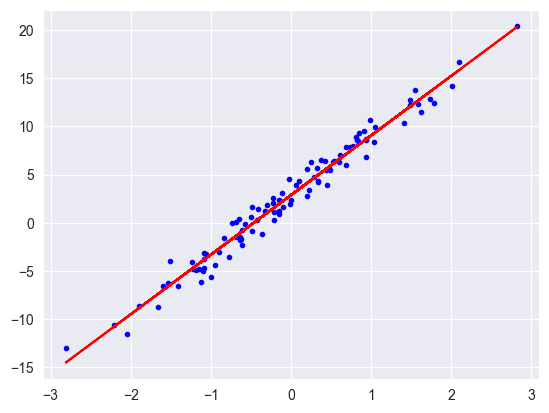

In [2]:
'''
mse:多元线性函数的损失函数（均方误差）
损失函数为mse的模型推导测试
W=(X⊺X)¯X⊺Y
'''
import numpy as np
import matplotlib.pyplot as plt

#创建一个满足正态分布的m*n维矩阵

#固定随机数种子
np.random.seed(33)
x_ = np.random.randn(100, 1)
print(x_)
y_ = 3 + 6 * x_ + np.random.randn(100, 1)
print(y_)
x_1 = np.c_[np.ones(100), x_]
print(x_1)
#根据mse损失函数求最优解公式可得
W = np.linalg.inv(x_1.T.dot(x_1)).dot(x_1.T).dot(y_)
print(W)  #第一个参数为截距，第二个参数为特征参数
#预测
y_predict = x_1.dot(W)

#使用sklearn模块求解线性回归函数的模型
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_, y_)
print(lr.coef_)  #特征参数
print(lr.intercept_)  #截距

#画图展示
plt.plot(x_, y_, 'b.')
plt.plot(x_, y_predict, 'r-')
plt.show()


In [21]:
'''
梯度下降法：得到损失函数后求解可用的模型的方法，是迭代求解法的实践
求解流程：
1. 随机一个模型W
2. 对样本的某一个维度求偏导
3. 计算下一个可能模型W（t+1）=W(t)-ŋ.gradient,ŋ为学习率，为正数
4. 判断损失函数是否收敛，若L(W(t+1))-L(W(t))的差值小于阈值，则认为已收敛
    可能为所求模型非为鞍点，不是局部极小值点

全量梯度下降法
'''
#可知mse的梯度为X^T.(XW-y)
#定义轮次
epoch_ = 10000


#定义获取学习率的函数
def getRate(t):
    return 1 / (1000 + t)


#随机一个初始模型
theta = np.random.randn(2, 1)  #因为X_是2列(包含一个截距项和一个维度项)
for i in range(epoch_):
    #求梯度
    gradient = x_1.T.dot(x_1.dot(theta) - y_)
    #计算下一个模型参数
    theta = theta - getRate(i) * gradient

print(theta)


[[2.86309653]
 [6.17979368]]


In [20]:
'''
小批量梯度下降法：模型训练更新时使用一批次数量的样本进行
'''
import numpy as np

np.random.seed(33)
x_ = np.random.randn(100, 1)
print(x_)
y_ = 3 + 6 * x_ + np.random.randn(100, 1)
print(y_)
x_1 = np.c_[np.ones(100), x_]
print(x_1)

epoch_ = 10000
#定义获取学习率的函数
def getRate(t):
    return 1 / (1000 + t)

#定义批次数量
m = 20
#批次
batch_size = int(epoch_ / m)
#定义随机模型
theta_batch = np.random.randn(2, 1)  #因为X_是2列(包含一个截距项和一个维度项)
for i in range(epoch_):
    #对数据进行乱序
    arr = np.arange(len(x_1))
    np.random.shuffle(arr)
    x_1 = x_1[arr]
    y_ = y_[arr]
    for j in range(batch_size):
        x_batch = x_1[j * batch_size: (j + 1) * batch_size]
        y_batch = y_[j * batch_size: (j + 1) * batch_size]
        #求梯度
        gradient1 = x_batch.T.dot(x_batch.dot(theta_batch) - y_batch)
        #计算下一个模型参数
        theta_batch = theta_batch - getRate(i * j) * gradient1

print(theta_batch)

[[-3.18853505e-01]
 [-1.60298056e+00]
 [-1.53521787e+00]
 [-5.70400895e-01]
 [-2.16728301e-01]
 [ 2.54874301e-01]
 [-1.49449937e-01]
 [ 2.01078257e+00]
 [-9.67841583e-02]
 [ 4.22201660e-01]
 [-2.25461563e-01]
 [-6.37943093e-01]
 [-1.62863037e-02]
 [ 1.04421678e+00]
 [-1.08488033e+00]
 [-2.20592483e+00]
 [-9.51219005e-01]
 [ 8.32973188e-01]
 [-1.00020817e+00]
 [ 3.43462745e-01]
 [ 1.54603026e+00]
 [ 6.90080945e-01]
 [-2.04585336e+00]
 [ 3.34466830e-01]
 [-6.41458675e-01]
 [-2.22496744e-01]
 [-1.23037440e+00]
 [ 2.05848242e-01]
 [ 8.21371405e-01]
 [-4.93780389e-01]
 [-1.40879352e+00]
 [-1.21632381e+00]
 [ 1.73429905e+00]
 [-2.06789862e-01]
 [-7.33188576e-01]
 [ 7.74162909e-01]
 [-7.77376219e-01]
 [-4.14635085e-01]
 [-1.14564119e+00]
 [ 3.25040500e-01]
 [ 5.94280850e-04]
 [ 1.41858803e+00]
 [-1.48825614e-01]
 [-6.06269921e-01]
 [-1.18580118e+00]
 [ 4.55504220e-01]
 [-8.37644946e-01]
 [-1.46961450e-01]
 [-6.82349711e-01]
 [ 1.48766965e+00]
 [-1.09471057e+00]
 [-1.65470688e+00]
 [-2.3842043